# Lab No.1

## Juan Fernando González
20170085

## Libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
%matplotlib inline

## Files

In [2]:

filepath = r'lab1\\'
df1 = pd.read_csv(filepath + 'los-angeles_9-24-2016_9-30-2017.csv')
df2 = pd.read_csv(filepath + 'new-york_9-24-2016_9-30-2017.csv')

Let's see the shape of the two Dataframes to see if they can concatenate.

In [3]:
# Shape

print('Dataframe 1 shape: ',df1.shape)
print('Dataframe 2 shape:',df2.shape)

Dataframe 1 shape:  (62, 25)
Dataframe 2 shape: (112, 25)


As we can see, both have different number of rows, but the same size in columns, and that's what we need to concatenate them.

In [4]:
# Concat. the two dataframes

data = pd.concat([df1, df2], ignore_index=True)
print(data.shape)

data.head()

(174, 25)


,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


## Cleaning Data

Re-name all column names so we can access all the column names easily.

In [5]:
# Re-naming the columns

data.columns = ['Commodity_Name', 'City_Name', 'Type', 'Package', 'Variety','Sub_Variety', 'Grade', 'Date', 'Low_Price', 'High_Price', 'Mostly_low', 'Mosty_High', 'Origin', 'Origin_Dist', 'Item_Size', 'Color', 'Env', 'Unit_of_sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Repack', 'Trans_Model']

data.head()

,Commodity_Name,City_Name,Type,Package,Variety,Sub_Variety,Grade,Date,Low_Price,High_Price,...,Color,Env,Unit_of_sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans_Model
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


Now, let's see the NaN values on our dataframe

In [6]:
print('----- NaN Values -----\n')
count_nan = len(data) - data.count()
count_nan

----- NaN Values -----



Commodity_Name      0
City_Name           0
Type              174
Package             0
Variety             0
Sub_Variety       150
Grade             174
Date                0
Low_Price           0
High_Price          0
Mostly_low          0
Mosty_High          0
Origin              0
Origin_Dist       128
Item_Size          24
Color             143
Env               174
Unit_of_sale       96
Quality           174
Condition         174
Appearance        174
Storage           174
Crop              174
Repack              0
Trans_Model       174
dtype: int64

Many Columns have NaN, so they will not be needed in our analysis.

In [7]:
def delete(series):
    
     del data[series]

delete('Sub_Variety')
delete('Grade')
delete('Type')
delete('Color')
delete('Env')
delete('Quality')
delete('Condition')
delete('Appearance')
delete('Storage')
delete('Crop')
delete('Trans_Model')
delete('Repack')
delete('Origin_Dist')

We will drop all remaining Nan's in the dataset

In [9]:
data.dropna(how ='any', inplace = True)

In [10]:
data.head()

,Commodity_Name,City_Name,Package,Variety,Date,Low_Price,High_Price,Mostly_low,Mosty_High,Origin,Item_Size,Unit_of_sale
0,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,lge,PER BIN
1,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,med,PER BIN
2,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,lge,PER BIN
3,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,med,PER BIN
4,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,lge,PER BIN


### City Name Column

We will replace categorical values to numeric values so then we can compute them.

In [11]:
# Replacing City_Name values to numeric values

data[['City_Name']] = data.City_Name.str.replace('LOS ANGELES', '0')
data[['City_Name']] = data.City_Name.str.replace('NEW YORK', '1')

data['City_Name'].head()

0    0
1    0
2    0
3    0
4    0
Name: City_Name, dtype: object

In [12]:
# Set Int to all string values of the City Name column

data['City_Name'] = data['City_Name'].astype(int)

### Item Size Column

We will do the same with Item Size...

As first step, we will see the unique values that this column have.

In [13]:
data.Item_Size.unique()

array(['lge', 'med', 'med-lge', 'sml', 'xlge'], dtype=object)

In [14]:
# Replacing Item Size values to numeric values

data[['Item_Size']] = data.Item_Size.str.replace('lge', '0')   
data[['Item_Size']] = data.Item_Size.str.replace('med', '1')
data[['Item_Size']] = data.Item_Size.str.replace('med-lge', '2') 
data[['Item_Size']] = data.Item_Size.str.replace('sml', '3')
data[['Item_Size']] = data.Item_Size.str.replace('xlge', '4')

In [15]:
data.Item_Size.unique()

array(['0', '1', '1-0', '3', 'x0'], dtype=object)

In [16]:
data[['Item_Size']] = data.Item_Size.str.replace('1-0', '2')
data[['Item_Size']] = data.Item_Size.str.replace('x0', '4')

In [17]:
data.Item_Size.unique()

array(['0', '1', '2', '3', '4'], dtype=object)

We will set all string values to int values in the Size item column

In [18]:
data['Item_Size'] = data['Item_Size'].astype(int)

In [19]:
data.head()

,Commodity_Name,City_Name,Package,Variety,Date,Low_Price,High_Price,Mostly_low,Mosty_High,Origin,Item_Size,Unit_of_sale
0,PUMPKINS,0,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,0,PER BIN
1,PUMPKINS,0,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,1,PER BIN
2,PUMPKINS,0,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,0,PER BIN
3,PUMPKINS,0,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,1,PER BIN
4,PUMPKINS,0,24 inch bins,HOWDEN TYPE,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,0,PER BIN


In [20]:
data['High_Price']

0      130.0
1      130.0
2      130.0
3      130.0
4      130.0
       ...  
127    150.0
128    140.0
136    200.0
137    200.0
138    265.0
Name: High_Price, Length: 69, dtype: float64

In [21]:
data['Item_Size']

0      0
1      1
2      0
3      1
4      0
      ..
127    0
128    0
136    0
137    0
138    0
Name: Item_Size, Length: 69, dtype: int32

### After Cleaning and Imputation

Let's see the shape of our features...

In [23]:
print('Item Size shape: \n', data.Item_Size.shape)

Item Size shape: 
 (69,)


So as we can see in the cell above, we have 69 rows but no columns... We need to add a new axis (column) to continue with our analysis.

In [25]:
# Adding a new a axis to the item size column

x_s = np.array(data['Item_Size'])[np.newaxis].T

x_s.shape

(69, 1)

Let's see the High Price feature now...

In [26]:
print('High Price shape: \n', data.High_Price.shape)

High Price shape: 
 (69,)


Yes, we have the same problem, so we need to do the same.

In [27]:
# Adding a new a axis to the high price column

y_s = np.array(data['High_Price'])[np.newaxis].T

y_s.shape

(69, 1)

So now we have our 2 features ready to be computed.

## Scatter Plot

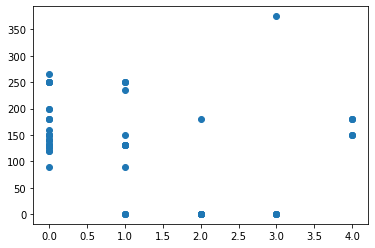

In [28]:
plt.scatter(x_s,y_s)

## Gradient Descent

Those are going to be some functions and terms that our Gradient function are going to use... so this will make a little easier to understand.

Functions and terms: 

    np.random.randn: 
        Create an array of the given shape and populate it with random 
        samples from a uniform distribution over [0, 1).

    np.linalg.inv: 
        Compute the (multiplicative) inverse of a matrix.

    .dot:
        Dot product of two arrays.

    .T:
        The transposed array.

    Learning rate - Alpha: 
        Size of steps took in any direction.
    
    Cost Function:
        Cost of the model.
    
    Gradients:
        The direction of the steps.
    
    m:
        Number of observations

### Cost Function

In [30]:
def cost(x, y, theta):
    '''
    Calculates the cost for given X and Y. 

    theta:
        Vector.
    x:
        Row vector 
    y: 
        Vector

    pred: 
        # h(theta), Nos da todas las hipotesis
    '''

    m = len(y)

    pred = x.dot(theta)
    f_cost = (1 / 2 * m) * np.sum(np.square(pred - y))

    return f_cost

### Gradient Descent Function

In [32]:
def gradient_descent(x, y, theta, alpha, max_it):
    '''
    Returns the final theta vector.

    alpha: 
        Learning rate
    X:
        Matrix of X with added bias.
        dim :
            m,2
    Y: 
        Vector of Y

    theta:
        dim: 
            m,1 
    '''

    m = len(y)

    cost_history = np.zeros(max_it)
    #alm_theta = np.zeros((max_it, 2))

    for i in range(max_it):

        pred = np.dot(x, theta)

        theta = theta - alpha * ((1 / m) * (x.T.dot((pred - y))))
        #alm_theta[i, :] = theta.T
        cost_history[i] = cost(x, y, theta)

    return theta

### Data

In [33]:
alpha = 0.001
max_it = 100000

X_vStack = np.c_[np.ones((len(x_s), 1)), x_s, x_s**2]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

j = gradient_descent(X_vStack, y_s, theta, alpha, max_it)

print("Theta: \n", j)

Theta: 
 [[ 172.51636885]
 [-107.17307078]
 [  25.24095788]]


### Data Visualization

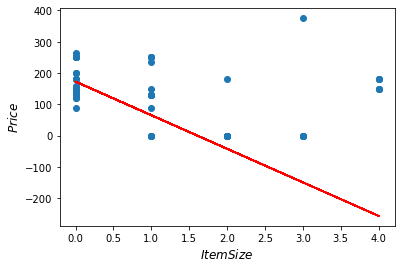

In [34]:
plt.scatter(x_s,y_s)
y = j[1] * x_s + j[0]
plt.plot(x_s, y, '-r')
plt.xlabel("$Item Size$", fontsize=12)
plt.ylabel("$Price$", fontsize=12)

plt.show()